<a href="https://colab.research.google.com/github/jennif8r/NLP/blob/main/Spacy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Baixando Biblioteca...

In [1]:
!pip install -U spacy==3.2.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.0/6.0 MB 12.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 659.5/659.5 kB 9.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.3/47.3 kB 2.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 4.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.0/57.0 kB 3.8 MB/s eta 0:00:00
  Attempting uninstall: wasabi
    Found existing installation: wasabi 1.1.3
    Uninstalling wasabi-1.1.3:
      Successfully uninstalled wasabi-1.1.3
  Attempting uninstall: typer
    Found existing installation: typer 0.12.3
    Uninstalling typer-0.12.3:
      Successfully uninstalled typer-0.12.3
  Attempting uninstall: smart-open
    Found existing installation: smart-open 7.0.4
    Uninstalling smart-open-7.0.4:
      Successfully uninstalled smart-open-7.0.4
  Attempting uninstall: pydantic
    Found existing installation: pydantic 2.8.0
    Uninstalling pydantic-2.8.0:
      Succes

Baixando a biblioteca do modelo pré-treinado em portugues:

In [2]:
!python -m spacy download 'pt_core_news_lg'

2024-07-08 11:28:21.469291: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-07-08 11:28:21.469357: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-07-08 11:28:21.472710: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-07-08 11:28:21.490875: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-07-08 11:28:23.696722: W tensorflow/compiler/tf2

In [3]:
import spacy

In [4]:
nlp = spacy.load('pt_core_news_lg')

/usr/local/lib/python3.10/dist-packages/torch/__init__.py:747: UserWarning: torch.set_default_tensor_type() is deprecated as of PyTorch 2.1, please use torch.set_default_dtype() and torch.set_default_device() as alternatives. (Triggered internally at ../torch/csrc/tensor/python_tensor.cpp:431.)
  _C._set_default_tensor_type(t)


In [5]:
print(type(nlp))

<class 'spacy.lang.pt.Portuguese'>


vamos verificar o que tem no objeto:

In [6]:
print(nlp.pipe_names)

['tok2vec', 'morphologizer', 'parser', 'attribute_ruler', 'lemmatizer', 'ner']


In [8]:
#Ao invez de subirmos um documento iremo criar e digitar seu dados dentro dele:

documento = nlp("As ações da Magazine Luiza S.A.,Franca, Brasil, acumularam baixa de 70% ao ano. Assim já devolveram todos os ganhos do período da pandemia.")
#documento = nlp("alegações extraordinárias requerem evidências extraordinárias.carl sagan: 'https://carlsangan.com'")

In [9]:
len(documento.vocab)

381

In [10]:
print(type(documento))

<class 'spacy.tokens.doc.Doc'>


#Produção de Tokens

### Tokenization
Processo de separar a sentença em suas partes: palavras, pontos, símbolos.

![Exemplo](/Imagem/Tokenization.png)

In [11]:
#pegar o nosso documento e fazer a tokenização dela.
for token in documento:
  print(token.text)

As
ações
da
Magazine
Luiza
S.A.,Franca
,
Brasil
,
acumularam
baixa
de
70
%
ao
ano
.
Assim
já
devolveram
todos
os
ganhos
do
período
da
pandemia
.


In [12]:
print(len(documento))

28


Identificar quais tokens é alfanumerico,stop word...

In [13]:
print("Token: ", [token.text for token in documento])
print("Stop word: ", [token.is_stop for token in documento])
print("Alfanumerico: ", [token.is_alpha for token in documento])
print("Maísculo: ", [token.is_upper for token in documento])
print("Pontuação: ", [token.is_punct for token in documento])
print("Número: ", [token.like_num for token in documento])
print("Setença Inicial: ", [token.is_sent_start for token in documento])

Token:  ['As', 'ações', 'da', 'Magazine', 'Luiza', 'S.A.,Franca', ',', 'Brasil', ',', 'acumularam', 'baixa', 'de', '70', '%', 'ao', 'ano', '.', 'Assim', 'já', 'devolveram', 'todos', 'os', 'ganhos', 'do', 'período', 'da', 'pandemia', '.']
Stop word:  [True, False, True, False, False, False, False, False, False, False, False, True, False, False, True, False, False, True, True, False, True, True, False, True, False, True, False, False]
Alfanumerico:  [True, True, True, True, True, False, False, True, False, True, True, True, False, False, True, True, False, True, True, True, True, True, True, True, True, True, True, False]
Maísculo:  [False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False]
Pontuação:  [False, False, False, False, False, False, True, False, True, False, False, False, False, True, False, False, True, False, False, False, False, False, F

In [15]:
#mostrar o formato das palavras
print("Tokens: ", [token.text for token in documento])
print("Formato: ", [token.shape_ for token in documento])

Tokens:  ['As', 'ações', 'da', 'Magazine', 'Luiza', 'S.A.,Franca', ',', 'Brasil', ',', 'acumularam', 'baixa', 'de', '70', '%', 'ao', 'ano', '.', 'Assim', 'já', 'devolveram', 'todos', 'os', 'ganhos', 'do', 'período', 'da', 'pandemia', '.']
Formato:  ['Xx', 'xxxx', 'xx', 'Xxxxx', 'Xxxxx', 'X.X.,Xxxxx', ',', 'Xxxxx', ',', 'xxxx', 'xxxx', 'xx', 'dd', '%', 'xx', 'xxx', '.', 'Xxxxx', 'xx', 'xxxx', 'xxxx', 'xx', 'xxxx', 'xx', 'xxxx', 'xx', 'xxxx', '.']


In [17]:
for token in documento:
  if token.like_num:
    print("Número encontrado: ", token.text)
  if token.is_punct:
    print("Pontuação encontrada: ", token.text)

Pontuação encontrada:  ,
Pontuação encontrada:  ,
Número encontrado:  70
Pontuação encontrada:  %
Pontuação encontrada:  .
Pontuação encontrada:  .


#Part-Of-Speech (POS)
Adiciona tags a cada token, como por exemplo, se é verbo, substantivo, etc.

![Exemplo](/Imagem/PartsOfSpeechTaggong.png)

O spaCy também gera as dependências dos tokens, que são as dependências sintáticas que existem entre os diferentes tokens.

In [23]:
# Os atributos com subscrito (_) mostram a representação textual do valor; sem o subscrito, eles podem retornar códigos numéricos que representam esses valores. Na verdade, eles trazem a referência para o objeto.
for token in documento:
  print(token.text, " - ", token.pos_, " - ", token.dep_ , " - ", token.lemma_ , " - ", token.shape_)

As  -  DET  -  det  -  As  -  Xx
ações  -  NOUN  -  nsubj  -  ações  -  xxxx
da  -  ADP  -  case  -  da  -  xx
Magazine  -  PROPN  -  nmod  -  Magazine  -  Xxxxx
Luiza  -  PROPN  -  appos  -  Luiza  -  Xxxxx
S.A.,Franca  -  PROPN  -  flat:name  -  S.A.,Franca  -  X.X.,Xxxxx
,  -  PUNCT  -  punct  -  ,  -  ,
Brasil  -  PROPN  -  conj  -  Brasil  -  Xxxxx
,  -  PUNCT  -  punct  -  ,  -  ,
acumularam  -  VERB  -  ROOT  -  acumular  -  xxxx
baixa  -  NOUN  -  obj  -  baixo  -  xxxx
de  -  ADP  -  case  -  de  -  xx
70  -  NUM  -  nummod  -  70  -  dd
%  -  SYM  -  nmod  -  %  -  %
ao  -  ADP  -  case  -  ao  -  xx
ano  -  NOUN  -  obl  -  ano  -  xxx
.  -  PUNCT  -  punct  -  .  -  .
Assim  -  ADV  -  advmod  -  Assim  -  Xxxxx
já  -  ADV  -  advmod  -  já  -  xx
devolveram  -  VERB  -  ROOT  -  devolver  -  xxxx
todos  -  DET  -  det  -  todo  -  xxxx
os  -  DET  -  det  -  o  -  xx
ganhos  -  NOUN  -  obj  -  ganho  -  xxxx
do  -  ADP  -  case  -  do  -  xx
período  -  NOUN  -  nmod  -  

In [26]:
#Traz uma descrição morfológica das palavras:
for token in documento:
  print(token.text, " - ", token.morph)

As  -  Definite=Def|Gender=Fem|Number=Plur|PronType=Art
ações  -  Gender=Fem|Number=Plur
da  -  Definite=Def|Gender=Fem|Number=Sing|PronType=Art
Magazine  -  Gender=Fem|Number=Sing
Luiza  -  Gender=Fem|Number=Sing
S.A.,Franca  -  Number=Sing
,  -  
Brasil  -  Gender=Masc|Number=Sing
,  -  
acumularam  -  Mood=Ind|Number=Plur|Person=3|Tense=Past|VerbForm=Fin
baixa  -  Gender=Fem|Number=Sing
de  -  
70  -  NumType=Card
%  -  
ao  -  Definite=Def|Gender=Masc|Number=Sing|PronType=Art
ano  -  Gender=Masc|Number=Sing
.  -  
Assim  -  
já  -  
devolveram  -  Mood=Ind|Number=Plur|Person=3|Tense=Past|VerbForm=Fin
todos  -  Gender=Masc|Number=Plur|PronType=Tot
os  -  Definite=Def|Gender=Masc|Number=Plur|PronType=Art
ganhos  -  Gender=Masc|Number=Plur
do  -  Definite=Def|Gender=Masc|Number=Sing|PronType=Art
período  -  Gender=Masc|Number=Sing
da  -  Definite=Def|Gender=Fem|Number=Sing|PronType=Art
pandemia  -  Gender=Fem|Number=Sing
.  -  


In [27]:
#Mais refinada:
for token in documento:
  print(token.text, " - ", token.tag_)

As  -  DET
ações  -  NOUN
da  -  ADP
Magazine  -  PROPN
Luiza  -  PROPN
S.A.,Franca  -  PROPN
,  -  PUNCT
Brasil  -  PROPN
,  -  PUNCT
acumularam  -  VERB
baixa  -  NOUN
de  -  ADP
70  -  NUM
%  -  SYM
ao  -  ADP
ano  -  NOUN
.  -  PUNCT
Assim  -  ADV
já  -  ADV
devolveram  -  VERB
todos  -  DET
os  -  DET
ganhos  -  NOUN
do  -  ADP
período  -  NOUN
da  -  ADP
pandemia  -  NOUN
.  -  PUNCT


####Listando Entidade Nomeadas

lista de entidades nomeadas do spacy:

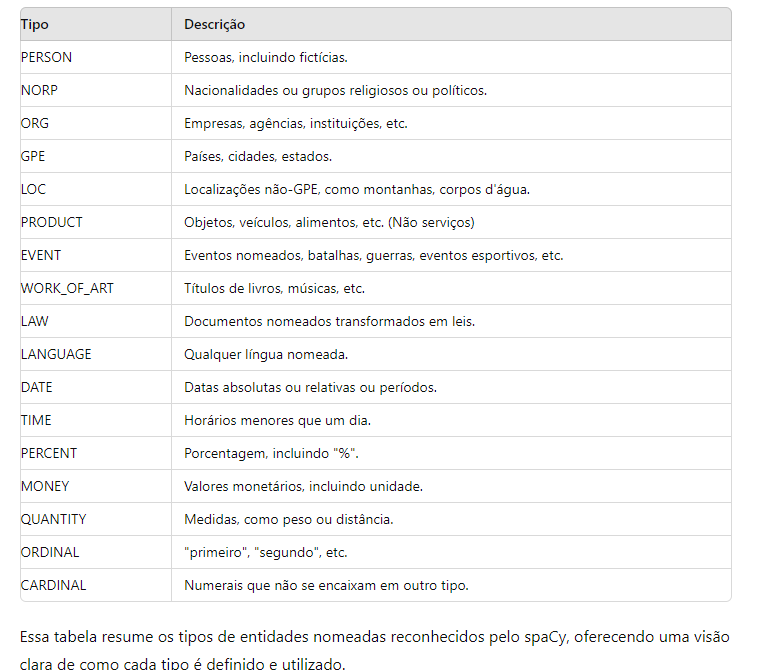

In [28]:
for ent in documento.ents:
  print(ent.text, " - ", ent.label_)

Magazine Luiza  -  ORG
Brasil  -  LOC


####Gerenciando Stop Words

In [29]:
for token in documento:
  if token.is_stop:
    print("Stop Word: ",token.text)

Stop Word:  As
Stop Word:  da
Stop Word:  de
Stop Word:  ao
Stop Word:  Assim
Stop Word:  já
Stop Word:  todos
Stop Word:  os
Stop Word:  do
Stop Word:  da


In [30]:
for words in nlp.Defaults.stop_words:
  print(words)

custa
dentro
quinze
sei
dizer
vos
de
aos
conselho
quieto
pode
dizem
quarto
naquele
vens
apenas
valor
quando
dão
isso
portanto
comprido
estará
vez
naquela
uma
cada
apontar
temos
vosso
para
fui
outra
vão
foste
tivestes
e
dezassete
ou
eu
maiorias
numa
vais
vossas
corrente
todas
agora
ora
qual
sétimo
meses
umas
vezes
grandes
estar
tu
sem
quarta
antes
ele
num
obrigado
então
neste
elas
essa
seis
estás
tive
tanta
pouca
segundo
tuas
em
aquela
era
pegar
usa
lugar
oito
ainda
esse
possível
último
isto
sabe
quero
treze
dessa
direita
estava
faz
tentaram
dá
questão
uns
nós
talvez
nuns
nova
tente
pelos
devem
oitavo
às
aqueles
esses
ambas
teve
pela
adeus
à
certamente
posição
fazem
somos
estiveste
também
demais
nessa
foram
enquanto
nada
sete
catorze
quieta
estes
vinda
dezoito
desde
vai
estou
local
seu
tiveste
primeira
possivelmente
meu
saber
puderam
tarde
ontem
a
aí
têm
nenhuma
terceiro
vinte
cento
breve
vêm
foi
podem
cá
seria
novos
usar
mal
por
entre
vários
fim
grande
ponto
querem
faço
tens
fez
ser
co

In [31]:
#caso tenha alguma palavra que queira adicionar na stop word, que o spacy não tenha colocado:

nlp.Defaults.stop_words.add('eita')
nlp.vocab['eita'].is_stop = True

In [32]:
nlp.vocab['eita'].is_stop

True

In [36]:
#remover as stop words no nosso corpous:
#crio uma lista com todos os tokens>
token_lista = []
for token in documento:
  token_lista.append(token.text)

#Agora vou ter uma lista stop words:
stop_lista=[]
for token in token_lista:
  if token in nlp.Defaults.stop_words:
    stop_lista.append(token)


#Lista dos tokens sem o stop word:

semStop = [ word for word in token_lista if word not in stop_lista]

print(documento.text)

print()

print(semStop)




As ações da Magazine Luiza S.A.,Franca, Brasil, acumularam baixa de 70% ao ano. Assim já devolveram todos os ganhos do período da pandemia.

['As', 'ações', 'Magazine', 'Luiza', 'S.A.,Franca', ',', 'Brasil', ',', 'acumularam', 'baixa', '70', '%', 'ano', '.', 'Assim', 'devolveram', 'ganhos', 'período', 'pandemia', '.']


####Vocabulário

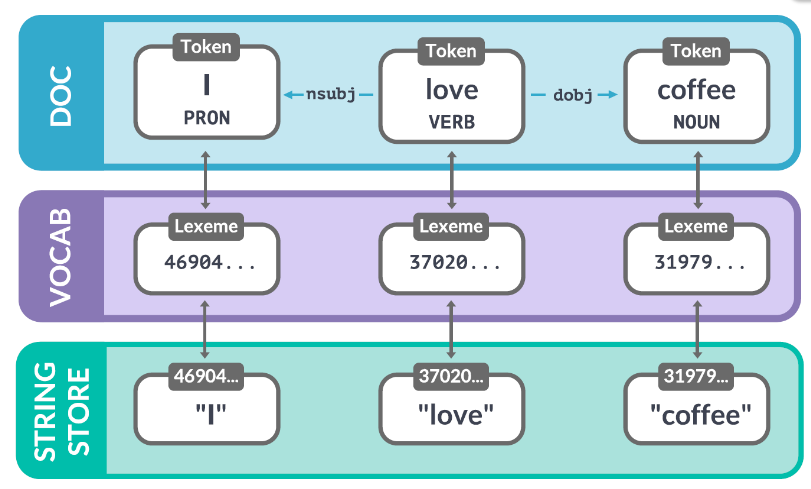


Esta imagem ilustra como o spaCy processa e armazena informações sobre o texto em três componentes principais:

DOC (Documento): Representa o texto processado, dividido em unidades chamadas tokens. Cada token possui atributos associados, como parte do discurso (PRON para pronome, VERB para verbo, NOUN para substantivo) e relações sintáticas com outros tokens (indicadas pelas setas nsubj e dobj, que representam sujeito nominal e objeto direto, respectivamente).

VOCAB (Vocabulário): Armazena lexemas, que são as formas canônicas das palavras. Cada token no documento é vinculado a um lexema no Vocab, identificado por um hash numérico único. Esse sistema de hashing facilita uma recuperação rápida e eficiente das informações das palavras.

STRING STORE (Armazenamento de Strings): É uma tabela que mapeia os hashes numéricos dos lexemas de volta para as strings de texto originais. Isso permite que o spaCy recupere rapidamente a forma de texto de qualquer palavra usando seu hash, associando-o novamente à sua forma textual, como "I", "love", e "coffee" para os hashes mostrados.

Essa estrutura integrada permite que o spaCy seja extremamente eficiente na análise e manipulação de textos, fornecendo acesso rápido às informações detalhadas de cada palavra processada.

In [45]:
# a palavra "dados" tem que ter o mesmo hash:
print("Hash: ", nlp.vocab.strings["dados"])
print("Hash: ", documento.vocab.strings["dados"])

#Qual a string referente ao hash:
print("String: ", nlp.vocab.strings [6013848609874238634])


Hash:  6013848609874238634
Hash:  6013848609874238634
String:  dados


In [46]:
lex = nlp.vocab['dados']
print(lex.text, " _ ", lex.orth, " _ ", lex.is_alpha, " _ ", lex.is_lower)

dados  _  6013848609874238634  _  True  _  True


######Embedding (Incorporação de Palavras)
Um embedding, ou incorporação de palavras, é uma representação de texto em forma de vetor num espaço de características contínuas, onde palavras semanticamente similares estão próximas umas das outras.

- O código abaixo é usado para explorar a representação vetorial, ou embedding, da palavra "dados" em um modelo de linguagem processado pelo spaCy.

In [48]:
print(nlp("dados").vector.shape)

(300,)


In [50]:
#Se eu quiser ver todo o vetor eu retiro o shape:
# os 300 peso da palavras em relação a outras 300 palavras
print(nlp("dados").vector)

[-1.8078e+00 -2.8421e+00 -5.5345e-01 -4.0565e+00 -2.3565e+00  4.7295e+00
 -3.3508e+00 -1.2036e+00 -5.3749e+00 -7.5768e-01 -2.0015e+00  5.3618e+00
  2.2789e-01  1.2136e+00 -1.4418e+00 -3.0621e+00  2.2060e+00  1.1943e+00
 -1.8689e+00 -5.9128e+00 -5.1929e-01  2.1897e+00 -2.4651e+00  1.7600e+00
 -5.6308e+00  1.0053e+00  7.3080e-01  2.0417e-01 -6.0370e+00  1.7474e+00
  2.0375e+00  2.7541e+00 -1.0423e+00  1.7632e+00 -1.4484e+00 -2.4344e+00
 -8.6094e-01  1.7867e+00 -4.9920e+00 -3.1162e+00 -5.3973e-01  2.4241e+00
  4.4410e-01 -4.7503e+00  2.1383e+00  3.8537e-01 -2.2418e+00  5.8104e+00
 -1.1731e+00  2.4686e-02 -1.8413e+00 -5.9321e+00 -7.0872e-03 -2.3093e+00
  5.5101e+00 -4.1795e-01  2.9754e+00  3.6709e-01 -8.0867e-01 -1.3751e+00
  4.8132e+00 -2.2835e+00 -2.0920e-01  1.2578e+00  4.3466e+00  1.3846e+00
 -1.5847e+00  3.3322e+00 -4.3669e+00  1.8883e+00 -1.2312e+00  3.7902e-01
  8.6331e-01 -4.0607e+00 -1.3444e+00  4.5210e+00  2.2995e-01 -5.9245e+00
 -2.0598e-01 -3.1810e+00 -3.8640e+00  7.2114e+00  3

In [52]:
# traz uma média das palavras que traz a sentença das outras palavras
print(nlp("dados são uma nova forma de ver o mundo").vector.shape)
print(nlp("dados são uma nova forma de ver o mundo").vector)

(300,)
[ 0.5255733  -1.0520301  -1.0489888   0.22808893 -2.7599888   0.91837215
 -1.6993556  -0.44524103 -2.209261   -1.2901455   0.9939946  -1.3996754
  0.7378708  -1.6957022  -1.382649   -1.1241877   2.503239    1.3766589
 -0.63682556  2.7080245  -0.6679023   0.7990059  -1.3761922   1.6491444
 -0.6950322   0.69378555 -0.19840002  1.6926199  -0.3071023   0.71506053
  0.03211441  0.27212894 -1.9055911  -1.5586021  -0.9775556   0.7999823
 -0.9553054   0.5265729  -0.87427455 -1.2073755  -2.117481    1.2241988
  1.5149522  -0.79308677 -1.1521667   0.13741441 -1.7882053   0.50415283
  1.3089666   0.06542712 -0.6260744  -1.5624356  -0.707184   -1.2425367
 -0.04237115 -0.5879791   1.7004043  -0.24798778  0.11633212 -0.55506223
  2.0148706   0.01965364  0.92778563  2.3571968  -0.49526003  1.0151839
  0.57112557  1.3510779  -0.3038622  -0.24523441 -0.42284998 -0.69732666
  0.71998227  0.2875956   0.10309222 -0.6866155   2.128672    0.9791889
 -1.4044011  -0.4600078   0.10599887  0.84635675  1.